### Package Python

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import os as os
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import autocorrelation_plot
from sklearn import linear_model

### Settings Jupyter

In [2]:
# set the max columns to none
pd.set_option('display.max_columns', None)

### Functions

In [3]:
def plotar(titulo: str, labelx: str, labely: str, x: str, y: str, dataset: dict, fontt: int, fontlx: int, fontly: int, hue: str, style: str) -> dict: 
    """Função para plotagem de gráfico"""
    sns.set_palette('husl')
    sns.set_style('whitegrid')
    ax = sns.lineplot(x = x, y = y, data = dataset, hue=hue, style=style)
    ax.figure.set_size_inches(16, 12)
    ax.set_title(titulo, loc='left', fontsize=fontt)
    ax.set_xlabel(labelx, fontsize=fontlx)
    ax.set_ylabel(labely, fontsize=fontly)
    ax = ax
    return ax

In [4]:
def plot_comparacao(x, y1,y2,y3, y4=None, params=False, dataset=None, titulo=None):
    plt.figure(figsize=(16,12))
    if params:
        ax = plt.subplot(4,1,1)
        ax.set_title(titulo, fontsize=18, loc='left')
        sns.lineplot(x = x, y = y1, data = dataset) 
        ax = plt.subplot(4,1,2)
        sns.lineplot(x = x, y = y2, data = dataset) 
        ax = plt.subplot(4,1,3)
        sns.lineplot(x = x, y = y3, data = dataset) 
        ax = plt.subplot(4,1,4)
        sns.lineplot(x = x, y = y4, data = dataset)     
    else:
        ax = plt.subplot(3,1,1)
        ax.set_title(titulo, fontsize=18, loc='left')
        sns.lineplot(x = x, y = y1, data = dataset) 
        ax = plt.subplot(3,1,2)
        sns.lineplot(x = x, y = y2, data = dataset) 
        ax = plt.subplot(3,1,3)
        sns.lineplot(x = x, y = y3, data = dataset)  
    ax = ax
    return ax

### Objective of this notebook.

This analyze aims to explore the ANAC database of flights from January 2022. It was used basic database for this study.

### Reading of bases

In [5]:
_path = os.getcwd()
_path

'c:\\git\\Gol_Cases'

In [6]:
_path1 = os.path.join(_path, 'data', 'basica2022-01.txt')
_path1

'c:\\git\\Gol_Cases\\data\\basica2022-01.txt'

In [7]:
_df = pd.read_csv(_path1, sep=';', encoding='latin1')
_df.shape

C:\Users\conta\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(69597, 110)

* Cleaning not necessary data for analyze.

In [8]:
_df = _df.drop(columns=[
'sg_empresa_icao',	
'sg_empresa_iata',
'nr_singular',	
'id_di',	
'cd_di',
'ds_di',
'ds_grupo_di', 
'nr_ano_referencia',
'nr_semestre_referencia',
'nr_trimestre_referencia',
'nr_ano_mes_referencia',
'id_tipo_linha',
'cd_tipo_linha',
'ds_tipo_linha',
'ds_natureza_tipo_linha',
'ds_servico_tipo_linha',
'nr_ano_partida_real',
'nr_semestre_partida_real',
'nm_semestre_partida_real',
'nr_trimestre_partida_real',
'nm_trimestre_partida_real',
'nr_mes_partida_real',
'nm_mes_partida_real',
'nr_semana_partida_real',
'nm_dia_semana_partida_real',
'nr_ano_mes_partida_real',
'sg_icao_origem',
'sg_uf_origem',
'nm_regiao_origem',	
'nr_ano_chegada_real',	
'nr_semestre_chegada_real',
'nm_semestre_chegada_real',
'nr_trimestre_chegada_real',
'nm_trimestre_chegada_real',
'nr_mes_chegada_real',
'nm_mes_chegada_real',
'nr_ano_mes_chegada_real',
'ds_matricula',
'sg_uf_destino',
'nm_regiao_destino',
'nr_escala_destino',
'lt_combustivel',
'kg_bagagem_livre',
'kg_bagagem_excesso',
'nr_decolagem',
'id_arquivo',
'nm_arquivo',
'nr_linha',	
'dt_sistema'])
_df.shape

(69597, 61)

In [9]:
_df = _df.rename(columns={'nr_assentos_ofertados':'pax_ofertados', 'nr_passag_pagos':'pax', 'nr_rpk':'rpk'})

In [10]:
_df.dtypes

id_basica                int64
id_empresa               int64
nm_empresa              object
nm_pais                 object
ds_tipo_empresa         object
                         ...  
nr_bagagem_gratis_km     int64
nr_ask                   int64
rpk                      int64
nr_atk                   int64
nr_rtk                   int64
Length: 61, dtype: object

Verifying nan values in the columns.

In [11]:
_df.describe()

,id_basica,id_empresa,nr_voo,nr_mes_referencia,nr_semana_referencia,nr_dia_referencia,nr_dia_partida_real,id_aerodromo_origem,nr_etapa,nr_semana_chegada_real,nr_dia_chegada_real,id_equipamento,id_aerodromo_destino,pax_ofertados,kg_payload,km_distancia,pax,nr_passag_gratis,kg_carga_paga,kg_carga_gratis,kg_correio,kg_peso,nr_pax_gratis_km,nr_carga_paga_km,nr_carga_gratis_km,nr_correio_km,nr_bagagem_paga_km,nr_bagagem_gratis_km,nr_ask,rpk,nr_atk,nr_rtk
count,6.959700e+04,6.959700e+04,69597.000000,69597.0,69597.000000,69597.000000,69597.000000,69597.000000,69597.000000,69596.000000,69596.000000,69597.000000,69597.000000,69597.000000,69597.000000,69597.000000,69597.000000,69597.000000,69597.000000,69597.000000,69597.000000,69597.000000,69597.000000,6.959700e+04,6.959700e+04,6.959700e+04,6.959700e+04,6.959700e+04,6.959700e+04,6.959700e+04,6.959700e+04,69597.000000
mean,2.264191e+07,1.000946e+06,3490.833944,1.0,3.571246,15.898473,15.901504,621.361898,1.055591,3.588022,15.910225,187.901835,623.448583,154.157967,19613.930442,1494.948403,123.306163,1.892467,1667.116973,6.296378,97.127965,12290.853686,3125.178312,8.564423e+06,1.710049e+04,1.611728e+05,1.201916e+04,1.530424e+06,2.819528e+05,2.241117e+05,4.614829e+04,28228.931750
std,2.053645e+04,3.945483e+02,2255.404553,0.0,1.300965,8.905715,8.904413,1884.908792,0.292194,1.298763,8.898590,188.504497,1892.198097,66.304140,13506.770209,1795.244317,57.833278,2.585987,7688.578916,71.073279,963.443954,8684.315281,10002.984847,4.940851e+07,3.720656e+05,1.777468e+06,3.733798e+04,4.861559e+06,5.496425e+05,4.221822e+05,1.124892e+05,70439.806904
min,2.260455e+07,1.000002e+06,2.000000,1.0,1.000000,1.000000,1.000000,5.000000,0.000000,1.000000,1.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.262400e+07,1.000854e+06,1802.000000,1.0,2.000000,8.000000,8.000000,218.000000,1.000000,2.000000,8.000000,16.000000,218.000000,118.000000,14998.000000,496.000000,95.000000,0.000000,0.000000,0.000000,0.000000,8654.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.065840e+05,5.931200e+04,4.501800e+04,7.160000e+03,4264.000000
50%,2.264201e+07,1.000909e+06,3178.000000,1.0,4.000000,16.000000,16.000000,427.000000,1.000000,4.000000,16.000000,101.000000,427.000000,170.000000,18165.000000,874.000000,130.000000,1.000000,53.000000,0.000000,0.000000,11432.000000,757.000000,3.782300e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.377040e+05,1.442100e+05,1.085850e+05,1.628300e+04,9865.000000
75%,2.265981e+07,1.001093e+06,4432.000000,1.0,5.000000,24.000000,24.000000,633.000000,1.000000,5.000000,24.000000,272.000000,633.000000,186.000000,19800.000000,1800.000000,160.000000,3.000000,445.000000,0.000000,0.000000,14188.000000,2495.000000,4.392360e+05,0.000000e+00,0.000000e+00,7.686000e+03,1.630210e+06,2.977920e+05,2.490180e+05,3.473500e+04,23021.000000
max,2.267771e+07,1.007484e+06,9998.000000,1.0,6.000000,31.000000,31.000000,21967.000000,7.000000,6.000000,31.000000,578.000000,21967.000000,516.000000,132631.000000,12217.000000,423.000000,39.000000,112046.000000,7790.000000,29061.000000,112046.000000,264908.000000,9.809300e+08,5.943020e+07,1.735520e+08,1.328650e+06,9.677660e+07,6.303970e+06,5.167790e+06,1.230060e+06,980930.000000


In [12]:
_counts_cols = _df.count().reset_index()
_counts_cols.columns = ['columns', 'values']
_counts_cols

,columns,values
0,id_basica,69597
1,id_empresa,69597
2,nm_empresa,69597
3,nm_pais,69597
4,ds_tipo_empresa,69597
...,...,...
56,nr_bagagem_gratis_km,69597
57,nr_ask,69597
58,rpk,69597
59,nr_atk,69597


In [13]:
_counts_cols[_counts_cols['values']!=69597]

,columns,values
19,sg_iata_origem,69588
25,hr_chegada_real,69595
27,nr_semana_chegada_real,69596
28,nm_dia_semana_chegada_real,69596
29,nr_dia_chegada_real,69596
35,sg_iata_destino,69588
48,nr_horas_voadas,69595
50,nr_velocidade_media,69595


In [14]:
_df =_df.fillna(0)

Removing white spaces.

In [15]:
_cols = _df.select_dtypes(include='object')
_cols = _cols.columns.to_list()
for i in _cols:
    _df[i] = _df[i].str.strip()


In [16]:
_df.loc[19].to_list()[7]

'1º SEMESTRE'

C:\Users\conta\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Pax')

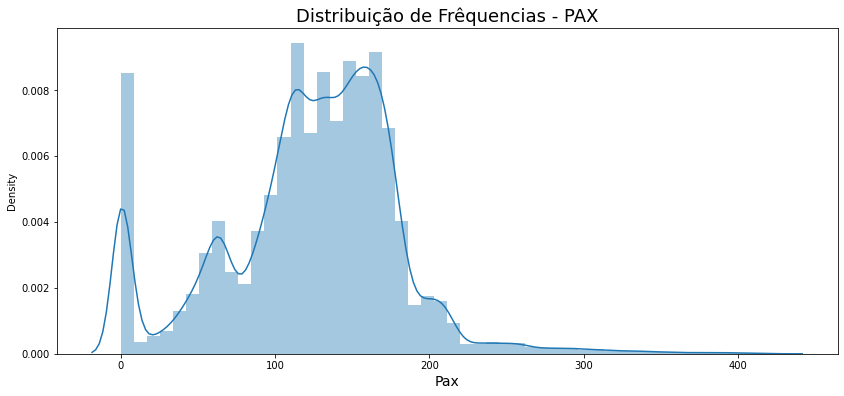

In [17]:
histograma =  sns.distplot(_df['pax'])
histograma.figure.set_size_inches(14,6)
histograma.set_title('Distribuição de Frêquencias - PAX', fontsize=18)
histograma.set_xlabel('Pax', fontsize=14)

C:\Users\conta\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Rpk')

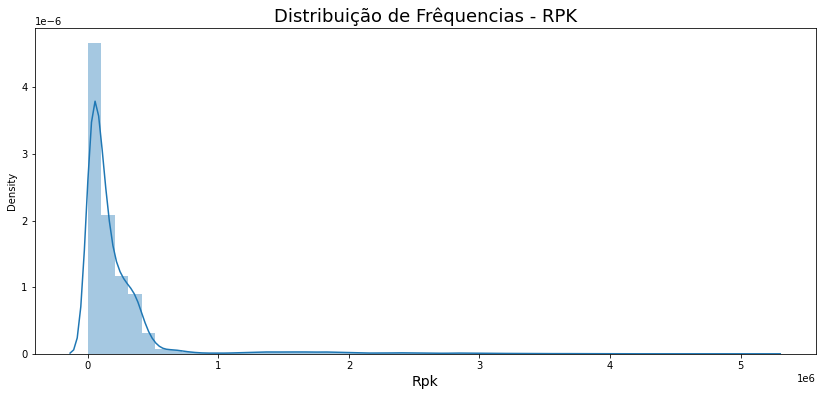

In [18]:
histograma =  sns.distplot(_df['rpk'])
histograma.figure.set_size_inches(14,6)
histograma.set_title('Distribuição de Frêquencias - RPK', fontsize=18)
histograma.set_xlabel('Rpk', fontsize=14)

C:\Users\conta\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'KM')

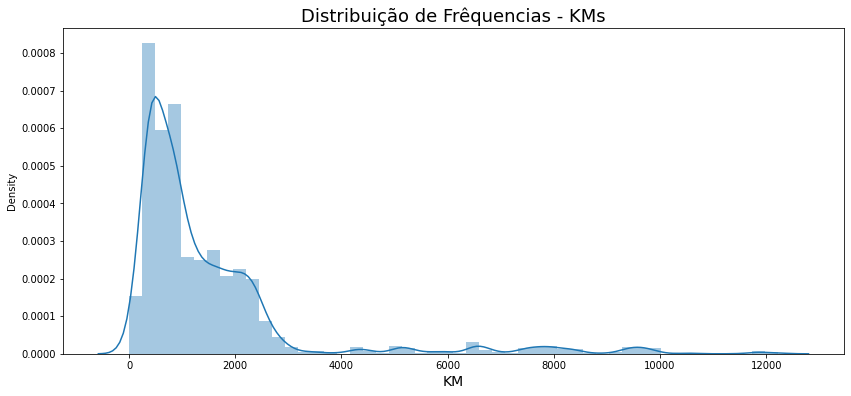

In [19]:
histograma =  sns.distplot(_df['km_distancia'])
histograma.figure.set_size_inches(14,6)
histograma.set_title('Distribuição de Frêquencias - KMs', fontsize=18)
histograma.set_xlabel('KM', fontsize=14)

In [20]:
_df['nr_horas_voadas'] = _df['nr_horas_voadas'].str.replace(',','.').astype(float)
_df['nr_velocidade_media'] = _df['nr_velocidade_media'].str.replace(',','.').astype(float)

In [21]:
_df.head(3)

,id_basica,id_empresa,nm_empresa,nm_pais,ds_tipo_empresa,nr_voo,dt_referencia,nm_semestre_referencia,nm_trimestre_referencia,nr_mes_referencia,nm_mes_referencia,nr_semana_referencia,nm_dia_semana_referencia,nr_dia_referencia,ds_natureza_etapa,hr_partida_real,dt_partida_real,nr_dia_partida_real,id_aerodromo_origem,sg_iata_origem,nm_aerodromo_origem,nm_municipio_origem,nm_pais_origem,nm_continente_origem,nr_etapa,hr_chegada_real,dt_chegada_real,nr_semana_chegada_real,nm_dia_semana_chegada_real,nr_dia_chegada_real,id_equipamento,sg_equipamento_icao,ds_modelo,id_aerodromo_destino,sg_icao_destino,sg_iata_destino,nm_aerodromo_destino,nm_municipio_destino,nm_pais_destino,nm_continente_destino,pax_ofertados,kg_payload,km_distancia,pax,nr_passag_gratis,kg_carga_paga,kg_carga_gratis,kg_correio,nr_horas_voadas,kg_peso,nr_velocidade_media,nr_pax_gratis_km,nr_carga_paga_km,nr_carga_gratis_km,nr_correio_km,nr_bagagem_paga_km,nr_bagagem_gratis_km,nr_ask,rpk,nr_atk,nr_rtk
0,22675635,1000358,AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA,COLÔMBIA,ESTRANGEIRA REGULAR,85,2022-01-21,1º SEMESTRE,1º TRIMESTRE,1,JANEIRO,4,SEXTA-FEIRA,21,INTERNACIONAL,00:01:00,2022-01-22,22,111,BOG,EL DORADO INTERNATIONAL AIRPORT,BOGOTÁ,COLÔMBIA,AMÉRICA DO SUL,1,05:59:00,2022-01-22,4.0,SÁBADO,22.0,15,A320,AIRBUS A320-100/200,301,SBGR,GRU,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,BRASIL,AMÉRICA DO SUL,150,17600,4336,150,0,149,0,0,5.96667,13649,726.68,0,646064,0,0,0,0,650400,650400,76313,59182
1,22675634,1000358,AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA,COLÔMBIA,ESTRANGEIRA REGULAR,249,2022-01-14,1º SEMESTRE,1º TRIMESTRE,1,JANEIRO,3,SEXTA-FEIRA,14,INTERNACIONAL,17:29:00,2022-01-14,14,111,BOG,EL DORADO INTERNATIONAL AIRPORT,BOGOTÁ,COLÔMBIA,AMÉRICA DO SUL,1,23:50:00,2022-01-14,3.0,SEXTA-FEIRA,14.0,14,A319,AIRBUS A319,301,SBGR,GRU,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,BRASIL,AMÉRICA DO SUL,120,15300,4336,91,3,760,0,0,6.35000,9220,682.81,13008,3295360,0,0,0,0,520320,394576,66340,38807
2,22675636,1000358,AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA,COLÔMBIA,ESTRANGEIRA REGULAR,248,2022-01-16,1º SEMESTRE,1º TRIMESTRE,1,JANEIRO,4,DOMINGO,16,INTERNACIONAL,01:30:00,2022-01-16,16,301,GRU,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,GUARULHOS,BRASIL,AMÉRICA DO SUL,1,07:06:00,2022-01-16,4.0,DOMINGO,16.0,14,A319,AIRBUS A319,111,SKBO,BOG,EL DORADO INTERNATIONAL AIRPORT,BOGOTÁ,COLÔMBIA,AMÉRICA DO SUL,120,15300,4336,120,0,0,0,0,5.60000,10800,774.26,0,0,0,0,0,0,520320,520320,66340,46828


In [22]:
_empresa = {}
empresa = _df['nm_empresa'].sort_values().unique()
for i in range(len(empresa)):
    _empresa[i] = empresa[i]
_empresa


{0: 'ABSA - AEROLINHAS BRASILEIRAS S.A.',
 1: 'AEROLINEAS ARGENTINAS S/A',
 2: 'AEROSUL TÁXI AÉREO LTDA (EX.: AUSTEN TÁXI AÉREO LTDA)',
 3: 'AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA',
 4: 'AEROVÍAS DE MÉXICO S.A DE C.V - AEROMÉXICO',
 5: 'AIR CANADA',
 6: 'AIR EUROPA LINEAS AEREAS SOCIEDAD ANONIMA',
 7: 'AMERICAN AIRLINES, INC.',
 8: 'ATLAS AIR INC',
 9: 'AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)',
 10: 'AZUL LINHAS AÉREAS BRASILEIRAS S/A',
 11: 'BOA BOLIVIANA DE AVIACIÓN',
 12: 'BRITISH AIRWAYS PLC',
 13: 'CARGOJET AIRWAYS LTD.',
 14: 'CARGOLUX AIRLINES INTERNATIONAL S/A',
 15: 'COMPAÑIA DE AVIACION PARAGUAYA SOCIEDAD ANONIMA - PARANAIR (EX- AMASZONAS PARAGUAY)',
 16: 'COMPAÑIA DE SERVICIOS DE TRANSPORTE AEREO AMASZONAS S/A.',
 17: 'COMPAÑIA PANAMEÑA DE AVIACION S.A. (COPA AIRLINES)',
 18: 'DELTA AIR LINES INC.',
 19: 'DEUTSCHE LUFTHANSA A.G.',
 20: 'EMIRATES',
 21: 'ETHIOPIAN AIRLINES GROUP',
 22: 'EUROATLANTIC AIRWAYS',
 23: 'FB LÍNEAS AÉREAS S.A (FLYBONDI)',
 24: 'FEDEX - F

In [23]:
_pais = {}
pais = _df['nm_pais'].sort_values().unique()
for i in range(len(pais)):
    _pais[i] = pais[i]
_pais

{0: 'ALEMANHA',
 1: 'ANGOLA',
 2: 'ARGENTINA',
 3: 'BOLÍVIA',
 4: 'BRASIL',
 5: 'CANADÁ',
 6: 'CHILE',
 7: 'COLÔMBIA',
 8: 'COREIA DO SUL',
 9: 'EMIRADOS ÁRABES UNIDOS',
 10: 'ESPANHA',
 11: 'ESTADOS UNIDOS DA AMÉRICA',
 12: 'ETIÓPIA',
 13: 'FRANÇA',
 14: 'GUIANA',
 15: 'HOLANDA',
 16: 'INGLATERRA',
 17: 'ITÁLIA',
 18: 'LUXEMBURGO',
 19: 'MOLDÁVIA',
 20: 'MÉXICO',
 21: 'PANAMÁ',
 22: 'PARAGUAI',
 23: 'PAÍSES BAIXOS',
 24: 'PERU',
 25: 'PORTUGAL',
 26: 'QATAR',
 27: 'SURINAME',
 28: 'SUÍÇA',
 29: 'TURQUIA',
 30: 'UCRÂNIA',
 31: 'VENEZUELA'}

Flights by companies.

In [24]:
frequencia = pd.crosstab(_df['nm_pais'], _df['nm_empresa'])
frequencia.rename(columns=_pais,inplace=True)
frequencia.rename(index=_empresa,inplace=True)
frequencia

nm_empresa,ABSA - AEROLINHAS BRASILEIRAS S.A.,AEROLINEAS ARGENTINAS S/A,AEROSUL TÁXI AÉREO LTDA (EX.: AUSTEN TÁXI AÉREO LTDA),AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA,AEROVÍAS DE MÉXICO S.A DE C.V - AEROMÉXICO,AIR CANADA,AIR EUROPA LINEAS AEREAS SOCIEDAD ANONIMA,"AMERICAN AIRLINES, INC.",ATLAS AIR INC,AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA),AZUL LINHAS AÉREAS BRASILEIRAS S/A,BOA BOLIVIANA DE AVIACIÓN,BRITISH AIRWAYS PLC,CARGOJET AIRWAYS LTD.,CARGOLUX AIRLINES INTERNATIONAL S/A,COMPAÑIA DE AVIACION PARAGUAYA SOCIEDAD ANONIMA - PARANAIR (EX- AMASZONAS PARAGUAY),COMPAÑIA DE SERVICIOS DE TRANSPORTE AEREO AMASZONAS S/A.,COMPAÑIA PANAMEÑA DE AVIACION S.A. (COPA AIRLINES),DELTA AIR LINES INC.,DEUTSCHE LUFTHANSA A.G.,EMIRATES,ETHIOPIAN AIRLINES GROUP,EUROATLANTIC AIRWAYS,FB LÍNEAS AÉREAS S.A (FLYBONDI),FEDEX - FEDERAL EXPRESS CORPORATION,FLY ALLWAYS N.V.,FLY PRO S.R.L.,GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS S.A.),IBÉRIA LINEAS AEREAS DE ESPAÑA SOCIEDAD ANONIMA OPERADORA,ITALIA TRANSPORTO AEREO S.P.A.,JETSMART AIRLINES SPA - CHILE,KALITTA AIR LLC,KLM CIA. REAL HOLANDESA DE AVIAÇÃO,KOREAN AIR LINES CO. LTD.,LAN CARGO S.A.,LAN PERU S.A.,LATAM AIRLINES GROUP (EX - LAN AIRLINES S/A),LUFTHANSA CARGO AG,LÍNEA AÉREA CARGUEIRA DE COLOMBIA S.A - LANCO,MAP TRANSPORTES AÉREOS LTDA.,MARTINAIR HOLLAND N.V.,MODERN TRANSPORTE AEREO DE CARGA S.A,NEOS S.P.A,OMNI AIR INTERNATIONAL,OMNI TÁXI AÉREO S.A.,PASSAREDO TRANSPORTES AÉREOS S.A.,PRIVILEGE STYLE S.A.,QATAR AIRWAYS GROUP,SATA INTERNACIONAL - AZORES AIRLINES,SIDERAL LINHAS AÉREAS LTDA.,SKY AIRLINES S.A.,SOCIÉTÉ AIR FRANCE,SURINAM AIRWAYS LTD,"SWIFT AIR, LLC",SWISS INTERNATIONAL AIR LINES LTD.,TAAG LINHAS AÉREAS DE ANGOLA (ANGOLA AIRLINES),TAM LINHAS AÉREAS S.A.,TAMPA CARGO S.A.,TAP - TRANSPORTES AÉREOS PORTUGUESES S/A,TOTAL LINHAS AÉREAS S.A.,TRANS GUYANA AIRWAYS,TRANSPORTE AÉREOS DEL MERCOSUR S.A. (TAM MERCOSUR),TURKISH AIRLINES INC,UKRAINE AIR ALLIANCE AIRLINES,"UNITED AIRLINES, INC",UPS - UNITED PARCEL SERVICE CO.
nm_pais,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ALEMANHA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ANGOLA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,0
ARGENTINA,0,362,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BOLÍVIA,0,0,0,0,0,0,0,0,0,0,0,98,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BRASIL,333,0,30,0,0,0,0,0,0,1337,21145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19969,0,0,0,0,0,0,0,0,0,0,0,554,0,103,0,0,16,1178,0,0,0,713,0,0,0,0,0,0,18233,0,0,194,0,0,0,0,0,0
CANADÁ,0,0,0,0,0,120,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CHILE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,181,0,392,0,0,0,0,0,0,0,0,0,0,0,0,0,148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
COLÔMBIA,0,0,0,186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,0,0,0,0,0,0,0,0
COREIA DO SUL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Percent of Flights by companies.

In [25]:
frequencia = pd.crosstab(_df['nm_pais'], _df['nm_empresa'], normalize=True)
frequencia.rename(columns=_pais,inplace=True)
frequencia.rename(index=_empresa,inplace=True)
frequencia

nm_empresa,ABSA - AEROLINHAS BRASILEIRAS S.A.,AEROLINEAS ARGENTINAS S/A,AEROSUL TÁXI AÉREO LTDA (EX.: AUSTEN TÁXI AÉREO LTDA),AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA,AEROVÍAS DE MÉXICO S.A DE C.V - AEROMÉXICO,AIR CANADA,AIR EUROPA LINEAS AEREAS SOCIEDAD ANONIMA,"AMERICAN AIRLINES, INC.",ATLAS AIR INC,AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA),AZUL LINHAS AÉREAS BRASILEIRAS S/A,BOA BOLIVIANA DE AVIACIÓN,BRITISH AIRWAYS PLC,CARGOJET AIRWAYS LTD.,CARGOLUX AIRLINES INTERNATIONAL S/A,COMPAÑIA DE AVIACION PARAGUAYA SOCIEDAD ANONIMA - PARANAIR (EX- AMASZONAS PARAGUAY),COMPAÑIA DE SERVICIOS DE TRANSPORTE AEREO AMASZONAS S/A.,COMPAÑIA PANAMEÑA DE AVIACION S.A. (COPA AIRLINES),DELTA AIR LINES INC.,DEUTSCHE LUFTHANSA A.G.,EMIRATES,ETHIOPIAN AIRLINES GROUP,EUROATLANTIC AIRWAYS,FB LÍNEAS AÉREAS S.A (FLYBONDI),FEDEX - FEDERAL EXPRESS CORPORATION,FLY ALLWAYS N.V.,FLY PRO S.R.L.,GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS S.A.),IBÉRIA LINEAS AEREAS DE ESPAÑA SOCIEDAD ANONIMA OPERADORA,ITALIA TRANSPORTO AEREO S.P.A.,JETSMART AIRLINES SPA - CHILE,KALITTA AIR LLC,KLM CIA. REAL HOLANDESA DE AVIAÇÃO,KOREAN AIR LINES CO. LTD.,LAN CARGO S.A.,LAN PERU S.A.,LATAM AIRLINES GROUP (EX - LAN AIRLINES S/A),LUFTHANSA CARGO AG,LÍNEA AÉREA CARGUEIRA DE COLOMBIA S.A - LANCO,MAP TRANSPORTES AÉREOS LTDA.,MARTINAIR HOLLAND N.V.,MODERN TRANSPORTE AEREO DE CARGA S.A,NEOS S.P.A,OMNI AIR INTERNATIONAL,OMNI TÁXI AÉREO S.A.,PASSAREDO TRANSPORTES AÉREOS S.A.,PRIVILEGE STYLE S.A.,QATAR AIRWAYS GROUP,SATA INTERNACIONAL - AZORES AIRLINES,SIDERAL LINHAS AÉREAS LTDA.,SKY AIRLINES S.A.,SOCIÉTÉ AIR FRANCE,SURINAM AIRWAYS LTD,"SWIFT AIR, LLC",SWISS INTERNATIONAL AIR LINES LTD.,TAAG LINHAS AÉREAS DE ANGOLA (ANGOLA AIRLINES),TAM LINHAS AÉREAS S.A.,TAMPA CARGO S.A.,TAP - TRANSPORTES AÉREOS PORTUGUESES S/A,TOTAL LINHAS AÉREAS S.A.,TRANS GUYANA AIRWAYS,TRANSPORTE AÉREOS DEL MERCOSUR S.A. (TAM MERCOSUR),TURKISH AIRLINES INC,UKRAINE AIR ALLIANCE AIRLINES,"UNITED AIRLINES, INC",UPS - UNITED PARCEL SERVICE CO.
nm_pais,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ALEMANHA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.001308,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00148,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ANGOLA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00023,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ARGENTINA,0.000000,0.005201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.001451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BOLÍVIA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001408,0.000000,0.000000,0.000000,0.000000,0.00005

In [26]:
frequencia.loc['BRASIL'].sort_values(ascending=False)

nm_empresa
AZUL LINHAS AÉREAS BRASILEIRAS S/A                     0.303821
GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS S.A.)    0.286923
TAM LINHAS AÉREAS S.A.                                 0.261980
AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)            0.019211
PASSAREDO TRANSPORTES AÉREOS S.A.                      0.016926
                                                         ...   
ITALIA TRANSPORTO AEREO S.P.A.                         0.000000
JETSMART AIRLINES SPA - CHILE                          0.000000
KALITTA AIR LLC                                        0.000000
KLM CIA. REAL HOLANDESA DE AVIAÇÃO                     0.000000
UPS - UNITED PARCEL SERVICE CO.                        0.000000
Name: BRASIL, Length: 66, dtype: float64

We can conclued that Azul Linhas Aéreas company represent 30% of the flights of Januray 2022.

### Grouping of passengers by company

In [27]:
passenger_by_comp = _df.groupby(['nm_dia_semana_referencia', 'nm_empresa'])['pax'].sum()
passenger_by_comp

nm_dia_semana_referencia  nm_empresa                                        
DOMINGO                   ABSA - AEROLINHAS BRASILEIRAS S.A.                       0
                          AEROLINEAS ARGENTINAS S/A                             8852
                          AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA        2992
                          AEROVÍAS DE MÉXICO S.A DE C.V - AEROMÉXICO            3355
                          AIR CANADA                                            4561
                                                                                ... 
TERÇA-FEIRA               TRANS GUYANA AIRWAYS                                    15
                          TRANSPORTE AÉREOS DEL MERCOSUR S.A. (TAM MERCOSUR)     855
                          TURKISH AIRLINES INC                                  2764
                          UNITED AIRLINES, INC                                  6981
                          UPS - UNITED PARCEL SERVICE CO.                

In [28]:
passenger_by_comp = passenger_by_comp.reset_index().rename(columns={'nm_dia_semana_referencia':'Dias da Semana', 'nm_empresa':'Companhias Aéreas', 'pax':'Quantidade de Passageiros'})
passenger_by_comp = passenger_by_comp.sort_values('Quantidade de Passageiros', ascending=False).reset_index(drop=True).nlargest(10, 'Quantidade de Passageiros')
# passenger_by_comp['Datas'] = pd.to_datetime(passenger_by_comp['Datas'] )
passenger_by_comp['Quantidade de Passageiros'] = passenger_by_comp['Quantidade de Passageiros'].astype(float)
passenger_by_comp


,Dias da Semana,Companhias Aéreas,Quantidade de Passageiros
0,SEGUNDA-FEIRA,GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS ...,473084.0
1,DOMINGO,GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS ...,462938.0
2,SEGUNDA-FEIRA,TAM LINHAS AÉREAS S.A.,431171.0
3,DOMINGO,TAM LINHAS AÉREAS S.A.,430066.0
4,SÁBADO,TAM LINHAS AÉREAS S.A.,416205.0
5,SÁBADO,GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS ...,415139.0
6,SEGUNDA-FEIRA,AZUL LINHAS AÉREAS BRASILEIRAS S/A,381685.0
7,TERÇA-FEIRA,GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS ...,365252.0
8,SEXTA-FEIRA,GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS ...,358215.0
9,QUARTA-FEIRA,GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS ...,354522.0


Top Ten Volumes

In [29]:
passenger_by_comp.dtypes

Dias da Semana                object
Companhias Aéreas             object
Quantidade de Passageiros    float64
dtype: object

<AxesSubplot:title={'left':'Passageiros por Companhia Aérea'}, xlabel='Datas', ylabel='Quantidade de Passageiros'>

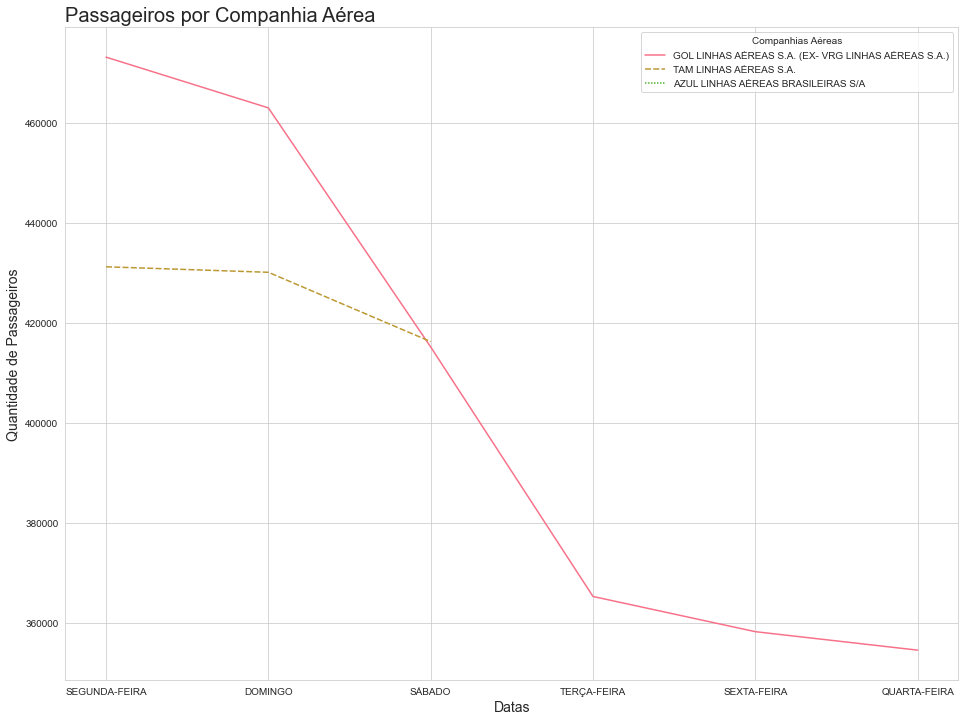

In [30]:
titulo = 'Passageiros por Companhia Aérea'
plotar(titulo=titulo, labelx='Datas', labely='Quantidade de Passageiros', x='Dias da Semana', y='Quantidade de Passageiros', dataset=passenger_by_comp, fontt=20, fontlx=14, fontly=14, hue='Companhias Aéreas', style='Companhias Aéreas') 